# 1. Database Connection :
### Use PyMySQL to establish a connection to the database in Pycharm or VS code.
### Verify the successful import of data in pycharm.

In [2]:
!pip install pymysql
!pip install matplotlib

In [3]:
import pymysql

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import csv

In [8]:
# establish connection with mysql database which i have already created directly in mysql workbench
conn=pymysql.connect(host='localhost',
                user='root',
                password='MySQL987654321$$',
                database='crime_database');

In [9]:
query='select * from crime_data_table'
df=pd.read_sql(query,conn)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_20080\2771113239.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


DR_NO  Date_Rptd   DATE_OCC    AREA_NAME  Crm_Cd  \
0   10304468 2020-01-08 2020-01-08    Southwest     624   
1  190101086 2020-01-02 2020-01-01      Central     624   
2  191501505 2020-01-01 2020-01-01  N Hollywood     745   
3  191921269 2020-01-01 2020-01-01      Mission     740   
4  200100502 2020-01-02 2020-01-02      Central     442   

                                         Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                           BATTERY - SIMPLE ASSAULT        36        F   
1                           BATTERY - SIMPLE ASSAULT        25        M   
2           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
3  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   
4           SHOPLIFTING - PETTY THEFT ($950 & UNDER)        23        M   

                                    Premis_Desc Current_Status  \
0                        SINGLE FAMILY DWELLING             AO   
1                                      SIDEWALK             IC   
2  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             IC   
3                           BEAUTY SUPPLY STORE             IC   
4                              DEPARTMENT STORE             IC   

            Location    LAT     LON  
0     1100 W 39TH PL  34.01 -118.30  
1      700 S HILL ST  34.05 -118.25  
2    5400 CORTEEN PL  34.17 -118.40  
3     14400 TITUS ST  34.22 -118.45  
4  700 S FIGUEROA ST  34.05 -118.26

In [10]:
cur=conn.cursor(); #used cursor way to read data as was getting error in red box

In [11]:
query='select * from crime_data_table'
cur.execute(query)
data=cur.fetchall()
data

((10304468,
  datetime.datetime(2020, 1, 8, 0, 0),
  datetime.datetime(2020, 1, 8, 0, 0),
  'Southwest',
  624,
  'BATTERY - SIMPLE ASSAULT',
  36,
  'F',
  'SINGLE FAMILY DWELLING',
  'AO',
  '1100 W 39TH PL',
  Decimal('34.010000'),
  Decimal('-118.300000')),
 (190101086,
  datetime.datetime(2020, 1, 2, 0, 0),
  datetime.datetime(2020, 1, 1, 0, 0),
  'Central',
  624,
  'BATTERY - SIMPLE ASSAULT',
  25,
  'M',
  'SIDEWALK',
  'IC',
  '700 S HILL ST',
  Decimal('34.050000'),
  Decimal('-118.250000')),
 (191501505,
  datetime.datetime(2020, 1, 1, 0, 0),
  datetime.datetime(2020, 1, 1, 0, 0),
  'N Hollywood',
  745,
  'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
  76,
  'F',
  'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'IC',
  '5400 CORTEEN PL',
  Decimal('34.170000'),
  Decimal('-118.400000')),
 (191921269,
  datetime.datetime(2020, 1, 1, 0, 0),
  datetime.datetime(2020, 1, 1, 0, 0),
  'Mission',
  740,
  'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
  31,
  'X',
  '

In [12]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Path to your Excel file
excel_file_path= r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\crime_data.xls"

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file_path)

# Access the data in the DataFrame
print(df)

         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
494  200106614  02-07-2020  02-07-2020      Central     624   
495  200106615  02-07-2020  02-07-2020      Central     624   
496  200106616  02-07-2020  02-07-2020      Central     624   
497  200106617  02-07-2020  01-10-2020      Central     510   
498  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2           

# 2. Database Setup and Import:
### Create a MySQL database & 
### Load the provided crime dataset into the MySQL database.

In [14]:
target_table = 'crime_data_table'

create_table_query = f'''CREATE TABLE IF NOT EXISTS {target_table} (
    DR_NO INT PRIMARY KEY,
    Date_Rptd DATETIME,
    DATE_OCC DATETIME,
    AREA_NAME VARCHAR(255),
    Crm_Cd INT,
    Crm_Cd_Desc	VARCHAR(255),
    Vict_Age INT,
    Vict_Sex VARCHAR(1) DEFAULT 'X',
    Premis_Desc	VARCHAR(255),
    Current_Status VARCHAR(2),
    Location VARCHAR(255),
    LAT	DECIMAL(10,6),
    LON DECIMAL(10,6)
)''';
cur.execute(create_table_query);

In [15]:
conn=pymysql.connect(host='localhost',
                user='root',
                password='MySQL987654321$$',
                database='crime_database');


# Database connection details
db_host = 'localhost'
db_user = 'root'
db_password = 'MySQL987654321$$'
db_name = 'crime_database'

# CSV file path
csv_file_path = r"C:\ProgramData\MySQL\MySQL Server 8.0\Uploads\crime_data.csv"

# Table name
table_name = "crime_data_table"

try:
  # Connect to the MySQL database
  connection = pymysql.connect(host=db_host, user=db_user, password=db_password, database=db_name)
  cursor = connection.cursor()

  # Open the CSV file
  with open(csv_file_path, 'r') as csvfile:
    # Read the CSV data using csv.reader
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip the header row (optional, adjust if no header)

#     # Prepare SQL statement (replace with your actual column names)
#     sql = """INSERT INTO """ + table_name + """ (DR_NO, Date_Rptd, DATE_OCC, AREA_NAME, Crm_Cd, Crm_Cd_Desc, Vict_Age, Vict_Sex, Premis_Desc, Current_Status, Location, LAT, LON
# ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s )"""

#     # Insert each row of data into the table now put in # since don't want to keep importing when run kernel all cell
#     for row in csv_reader:
#       cursor.execute(sql, row)

  # Commit the changes
  connection.commit()
  print("Data imported successfully!")

except pymysql.Error as err:
  print("Error: {}".format(err))

Data imported successfully!


In [16]:
query='select * from crime_data_table'
cur.execute(query)
data=cur.fetchall()
data

((10304468,
  datetime.datetime(2020, 1, 8, 0, 0),
  datetime.datetime(2020, 1, 8, 0, 0),
  'Southwest',
  624,
  'BATTERY - SIMPLE ASSAULT',
  36,
  'F',
  'SINGLE FAMILY DWELLING',
  'AO',
  '1100 W 39TH PL',
  Decimal('34.010000'),
  Decimal('-118.300000')),
 (190101086,
  datetime.datetime(2020, 1, 2, 0, 0),
  datetime.datetime(2020, 1, 1, 0, 0),
  'Central',
  624,
  'BATTERY - SIMPLE ASSAULT',
  25,
  'M',
  'SIDEWALK',
  'IC',
  '700 S HILL ST',
  Decimal('34.050000'),
  Decimal('-118.250000')),
 (191501505,
  datetime.datetime(2020, 1, 1, 0, 0),
  datetime.datetime(2020, 1, 1, 0, 0),
  'N Hollywood',
  745,
  'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
  76,
  'F',
  'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
  'IC',
  '5400 CORTEEN PL',
  Decimal('34.170000'),
  Decimal('-118.400000')),
 (191921269,
  datetime.datetime(2020, 1, 1, 0, 0),
  datetime.datetime(2020, 1, 1, 0, 0),
  'Mission',
  740,
  'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
  31,
  'X',
  '

In [17]:
df=pd.DataFrame(data,columns=["DR_NO","Date_Rptd","DATE_OCC","AREA_NAME","Crm_Cd","Crm_Cd_Desc","Vict_Age","Vict_Sex","Premis_Desc","Current_Status","Location","LAT","LON"])
df

DR_NO  Date_Rptd   DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468 2020-01-08 2020-01-08    Southwest     624   
1    190101086 2020-01-02 2020-01-01      Central     624   
2    191501505 2020-01-01 2020-01-01  N Hollywood     745   
3    191921269 2020-01-01 2020-01-01      Mission     740   
4    200100502 2020-01-02 2020-01-02      Central     442   
..         ...        ...        ...          ...     ...   
494  211507896 2021-04-11 2020-11-07  N Hollywood     354   
495  211613998 2021-11-08 2020-11-01     Foothill     354   
496  211715638 2021-12-01 2020-12-09   Devonshire     354   
497  220705246 2022-02-03 2020-02-11     Wilshire     341   
498  222013040 2022-08-06 2020-06-04      Olympic     354   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2             VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
3    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   
4             SHOPLIFTING - PETTY THEFT ($950 & UNDER)        23        M   
..                                                 ...       ...      ...   
494                                  THEFT OF IDENTITY        31        M   
495                                  THEFT OF IDENTITY        64        F   
496                                  THEFT OF IDENTITY        56        F   
497  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...        57        F   
498                                  THEFT OF IDENTITY        60        M   

                                      Premis_Desc Current_Status  \
0                          SINGLE FAMILY DWELLING             AO   
1                                        SIDEWALK             IC   
2    MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             IC   
3                             BEAUTY SUPPLY STORE             IC   
4                                DEPARTMENT STORE             IC   
..                                            ...            ...   
494                        SINGLE FAMILY DWELLING             IC   
495                        SINGLE FAMILY DWELLING             IC   
496                        SINGLE FAMILY DWELLING             IC   
497                        SINGLE FAMILY DWELLING             IC   
498                        SINGLE FAMILY DWELLING             IC   

                Location        LAT          LON  
0         1100 W 39TH PL  34.010000  -118.300000  
1          700 S HILL ST  34.050000  -118.250000  
2        5400 CORTEEN PL  34.170000  -118.400000  
3         14400 TITUS ST  34.220000  -118.450000  
4      700 S FIGUEROA ST  34.050000  -118.260000  
..                   ...        ...          ...  
494  100 W WASHINGTON BL  34.210000  -118.410000  
495             WESTLAKE  34.270000  -118.360000  
496           BURLINGTON  34.280000  -118.470000  
497      7900 WOODMAN AV  34.060000  -118.340000  
498     2200 W SUNSET BL  34.050000  -118.300000  

[499 rows x 13 columns]

# 3. Data Exploration:
### Retrieve basic statistics on the dataset, such as the total number of records and unique values in specific columns.
### Identify the distinct crime codes and their descriptions.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DR_NO           499 non-null    int64         
 1   Date_Rptd       499 non-null    datetime64[ns]
 2   DATE_OCC        499 non-null    datetime64[ns]
 3   AREA_NAME       499 non-null    object        
 4   Crm_Cd          499 non-null    int64         
 5   Crm_Cd_Desc     499 non-null    object        
 6   Vict_Age        499 non-null    int64         
 7   Vict_Sex        499 non-null    object        
 8   Premis_Desc     499 non-null    object        
 9   Current_Status  499 non-null    object        
 10  Location        499 non-null    object        
 11  LAT             499 non-null    object        
 12  LON             499 non-null    object        
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 50.8+ KB


In [19]:
conn=pymysql.connect(host='localhost',
                user='root',
                password='MySQL987654321$$',
                database='crime_database');

df2=pd.read_sql("select * from crime_data_table",conn)
df2


C:\Users\hp\AppData\Local\Temp\ipykernel_20080\3295839553.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2=pd.read_sql("select * from crime_data_table",conn)


DR_NO  Date_Rptd   DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468 2020-01-08 2020-01-08    Southwest     624   
1    190101086 2020-01-02 2020-01-01      Central     624   
2    191501505 2020-01-01 2020-01-01  N Hollywood     745   
3    191921269 2020-01-01 2020-01-01      Mission     740   
4    200100502 2020-01-02 2020-01-02      Central     442   
..         ...        ...        ...          ...     ...   
494  211507896 2021-04-11 2020-11-07  N Hollywood     354   
495  211613998 2021-11-08 2020-11-01     Foothill     354   
496  211715638 2021-12-01 2020-12-09   Devonshire     354   
497  220705246 2022-02-03 2020-02-11     Wilshire     341   
498  222013040 2022-08-06 2020-06-04      Olympic     354   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2             VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
3    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   
4             SHOPLIFTING - PETTY THEFT ($950 & UNDER)        23        M   
..                                                 ...       ...      ...   
494                                  THEFT OF IDENTITY        31        M   
495                                  THEFT OF IDENTITY        64        F   
496                                  THEFT OF IDENTITY        56        F   
497  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...        57        F   
498                                  THEFT OF IDENTITY        60        M   

                                      Premis_Desc Current_Status  \
0                          SINGLE FAMILY DWELLING             AO   
1                                        SIDEWALK             IC   
2    MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)             IC   
3                             BEAUTY SUPPLY STORE             IC   
4                                DEPARTMENT STORE             IC   
..                                            ...            ...   
494                        SINGLE FAMILY DWELLING             IC   
495                        SINGLE FAMILY DWELLING             IC   
496                        SINGLE FAMILY DWELLING             IC   
497                        SINGLE FAMILY DWELLING             IC   
498                        SINGLE FAMILY DWELLING             IC   

                Location    LAT     LON  
0         1100 W 39TH PL  34.01 -118.30  
1          700 S HILL ST  34.05 -118.25  
2        5400 CORTEEN PL  34.17 -118.40  
3         14400 TITUS ST  34.22 -118.45  
4      700 S FIGUEROA ST  34.05 -118.26  
..                   ...    ...     ...  
494  100 W WASHINGTON BL  34.21 -118.41  
495             WESTLAKE  34.27 -118.36  
496           BURLINGTON  34.28 -118.47  
497      7900 WOODMAN AV  34.06 -118.34  
498     2200 W SUNSET BL  34.05 -118.30  

[499 rows x 13 columns]

In [20]:
# Basic Statistics : 

# Total number of records

cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
total_records = cursor.fetchone()[0]
print(f"Total records: {total_records}")

Total records: 499


In [21]:
# Find Unique types of crimes: 

cursor.execute(f"SELECT COUNT(DISTINCT Crm_Cd) FROM {table_name}")
unique_crime_codes = cursor.fetchone()[0]
print(f"Unique values in 'crime_code' column: {unique_crime_codes}")

Unique values in 'crime_code' column: 42


In [22]:
# 2. Distinct Crime Codes and Descriptions

  # Assuming you have separate columns for 'crime_code' and 'crime_description' (adjust column names)
cursor.execute(f"SELECT DISTINCT Crm_Cd, Crm_Cd_Desc FROM {table_name}")

distinct_crimes = cursor.fetchall()

print("\nDistinct Crime Codes and Descriptions:") #Used for loop 
for code, description in distinct_crimes: 
    print(f"Crime Code: {code}, Description: {description}")


Distinct Crime Codes and Descriptions:
Crime Code: 624, Description: BATTERY - SIMPLE ASSAULT
Crime Code: 745, Description: VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Crime Code: 740, Description: VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)
Crime Code: 442, Description: SHOPLIFTING - PETTY THEFT ($950 & UNDER)
Crime Code: 946, Description: OTHER MISCELLANEOUS CRIME
Crime Code: 341, Description: THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD
Crime Code: 330, Description: BURGLARY FROM VEHICLE
Crime Code: 930, Description: CRIMINAL THREATS - NO WEAPON DISPLAYED
Crime Code: 648, Description: ARSON
Crime Code: 230, Description: ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
Crime Code: 350, Description: THEFT, PERSON
Crime Code: 310, Description: BURGLARY
Crime Code: 480, Description: BIKE - STOLEN
Crime Code: 623, Description: BATTERY POLICE (SIMPLE)
Crime Code: 440, Description: THEFT PLAIN - PETTY ($950 & UNDER)
Crime Code: 510, Description: VEHICLE - STOLEN
Crime C

# 4. Temporal Analysis: 
### Analyze the temporal aspects of the data.
### Determine trends in crime occurrence over time.


**Temporal Analysis of Crm_Cd**

Daily Descriptive Statistics:
count    949.000000
mean       0.525817
std        3.430537
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       42.000000
Name: Crm_Cd, dtype: float64

Weekly Descriptive Statistics:
count    136.000000
mean       3.669118
std       20.754671
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      189.000000
Name: Crm_Cd, dtype: float64

Monthly Descriptive Statistics:
count     32.000000
mean      15.593750
std       58.454206
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max      309.000000
Name: Crm_Cd, dtype: float64

Yearly Descriptive Statistics:
count      3.000000
mean     166.333333
std      281.176694
min        2.000000
25%        4.000000
50%        6.000000
75%      248.500000
max      491.000000
Name: Crm_Cd, dtype: float64


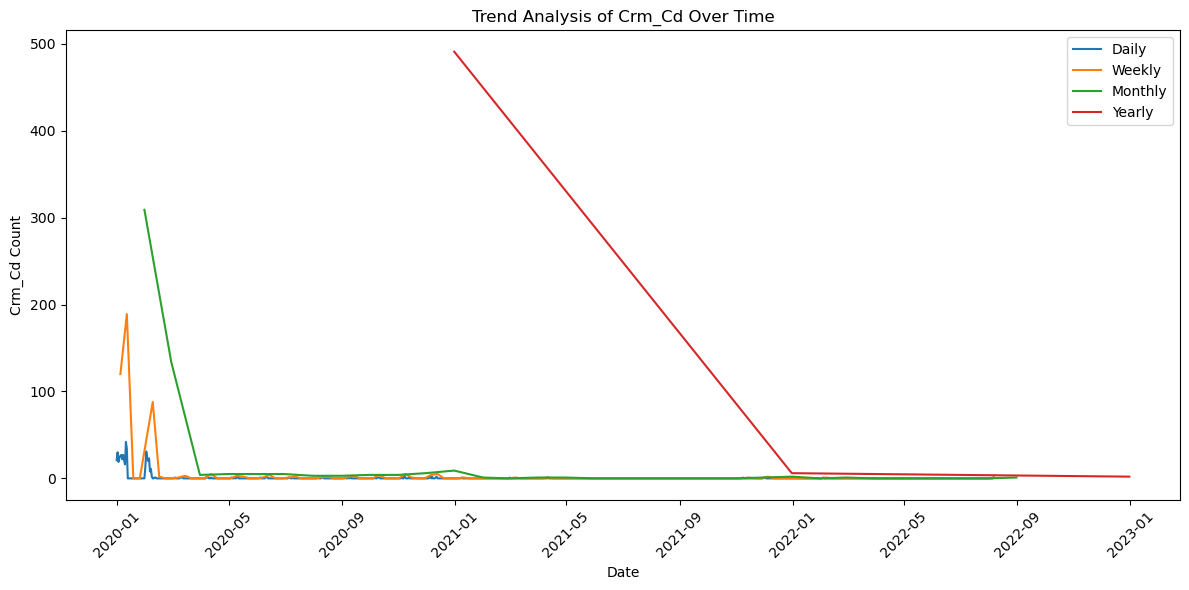

In [24]:
# SQL query to retrieve data
sql_query = """
SELECT Date_Rptd, DATE_OCC, Crm_Cd
FROM crime_data_table
"""

# Execute the query and store results in a pandas DataFrame
cursor.execute(sql_query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns=[col[0] for col in cursor.description])  # Get column names
df

# Set 'date' as the index 

df['Date_Rptd'] = pd.to_datetime(df['Date_Rptd'])
df.set_index('Date_Rptd', inplace=True)


# Analyze temporal aspects
crime_cols = ['Crm_Cd']  # List of crime type columns
for col in crime_cols:
    print(f"\n**Temporal Analysis of {col}**")

# Daily/Weekly/Monthly/Yearly Aggregation (adjust as needed)
daily_data = df[col].resample('D').count()
weekly_data = df[col].resample('W').count()
monthly_data = df[col].resample('M').count()
yearly_data = df[col].resample('Y').count()

# Descriptive statistics for each aggregation level
print(f"\nDaily Descriptive Statistics:")
print(daily_data.describe())

print(f"\nWeekly Descriptive Statistics:")
print(weekly_data.describe())

print(f"\nMonthly Descriptive Statistics:")
print(monthly_data.describe())

print(f"\nYearly Descriptive Statistics:")
print(yearly_data.describe())


# Trend analysis using time series plots
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data, label='Daily')
plt.plot(weekly_data.index, weekly_data, label='Weekly')
plt.plot(monthly_data.index, monthly_data, label='Monthly')
plt.plot(yearly_data.index, yearly_data, label='Yearly')
plt.xlabel('Date')
plt.ylabel(f"{col} Count")
plt.title(f"Trend Analysis of {col} Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Spatial Analysis: 
### Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.
### Visualize crime hotspots on a map.

# Questions:
## Spatial Analysis:
## Where are the geographical hotspots for reported crimes?

## Location Analysis:

## Where do most crimes occur based on the "Location" column?

In [27]:
query='select * from crime_data_table'
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["DR_NO","Date_Rptd","DATE_OCC","AREA_NAME","Crm_Cd","Crm_Cd_Desc","Vict_Age","Vict_Sex","Premis_Desc","Current_Status","Location","LAT","LON"])
df

try:
  # Check if 'LAT' and 'LON' columns exist
  if 'LAT' not in df.columns or 'LON' not in df.columns:
    print("Error: 'LAT' or 'LON' columns not found in the DataFrame.")
    exit()
except NameError:
  print("Error: 'df' DataFrame is not defined. Please provide your data.")
  exit()

# Count of unique 'LAT' and 'LON'
unique_lat_count = df['LAT'].nunique()
unique_lon_count = df['LON'].nunique()

print(f"\nCount of unique 'LAT': {unique_lat_count}")
print(f"Count of unique 'LON': {unique_lon_count}")



Count of unique 'LAT': 35
Count of unique 'LON': 29


In [30]:
# SQL query to retrieve data
sql_query = """
SELECT LAT, LON, Location
FROM crime_data_table
"""

cursor = conn.cursor()

# Execute the query and store results in a pandas DataFrame
cursor.execute(sql_query)
fetch_size = 500 
data = []
while True:
  fetched_data = cursor.fetchmany(fetch_size)
  if not fetched_data:
    break
  data.extend(fetched_data)

# Create DataFrame
df = pd.DataFrame(data, columns=[col[0] for col in cursor.description]) 

df

LAT          LON             Location
0    34.010000  -118.300000       1100 W 39TH PL
1    34.050000  -118.250000        700 S HILL ST
2    34.170000  -118.400000      5400 CORTEEN PL
3    34.220000  -118.450000       14400 TITUS ST
4    34.050000  -118.260000    700 S FIGUEROA ST
..         ...          ...                  ...
494  34.210000  -118.410000  100 W WASHINGTON BL
495  34.270000  -118.360000             WESTLAKE
496  34.280000  -118.470000           BURLINGTON
497  34.060000  -118.340000      7900 WOODMAN AV
498  34.050000  -118.300000     2200 W SUNSET BL

[499 rows x 3 columns]

In [31]:
!pip install folium
import folium

In [32]:
data = {'Location': ['1100 W 39TH PL',
'700 S HILL ST',
'5400 CORTEEN PL',
'14400 TITUS ST',
'700 S FIGUEROA ST',
'200 E 6TH ST',
'700 BERNARD ST',
'800 N ALAMEDA ST',
'800 S OLIVE ST',
'700 W 7TH ST',
'100 S LOS ANGELES ST',
'13600 LEADWELL ST',
'8TH',
'WALL',
'800 N BROADWAY',
'400 S SPRING ST',
'300 W 5TH ST',
'1800 S MAIN ST',
'600 W 7TH ST',
'700 ALPINE ST',
'6200 SYLMAR AV',
'100 E 5TH ST',
'1200 E 7TH ST',
'700 S FLOWER ST',
'300 E 3RD ST',
'1ST',
'1200 S GRAND AV',
'300 S GRAND AV',
'600 S CENTRAL AV',
'600 N BROADWAY',
'800 W 7TH ST',
'7TH ST',
'23400 PRESIDENT AV',
'700 W 7TH ST',
'13100 LAKE ST',
'100 W 1ST ST',
'3RD',
'6TH',
'1ST',
'1600 S HOPE ST',
'600 W 7TH ST',
'600 S SAN PEDRO ST',
'100 W 2ND ST',
'100 E 5TH ST',
'700 W 7TH ST',
'4TH',
'700 S GRAND AV',
'5TH',
'100 E 5TH ST',
'PALMETTO',
'800 JAMES M WOOD BL',
'GRAND',
'GRAND',
'200 N AVENUE 25',
'500 SAN JULIAN ST',
'43RD ST',
'100 PASEO DE LA PLAZA',
'500 S SAN PEDRO ST',
'1300 S LOS ANGELES ST',
'800 S FIGUEROA ST',
'800 N ALAMEDA ST',
'JESSE ST',
'500 S SAN PEDRO ST',
'700 W 7TH ST',
'100 E 4TH ST',
'600 S SPRING ST',
'800 N ALAMEDA ST',
'600 S SPRING ST',
'7TH',
'900 NEW DEPOT ST',
'400 CASANOVA ST',
'600 S GRAND AV',
'500 S SPRING ST',
'600 WALL ST',
'900 N BROADWAY',
'5TH ST',
'700 S OLIVE ST',
'100 N LOS ANGELES ST',
'6TH ST',
'900 S LOS ANGELES ST',
'800 N ALAMEDA ST',
'800 N ALAMEDA ST',
'800 N ALAMEDA ST',
'200 N SOTO ST',
'HILL',
'700 S BROADWAY',
'1800 S MAIN ST',
'700 S FIGUEROA ST',
'SPRING ST',
'6TH ST',
'2200 SAN YSIDRO DR',
'8TH',
'800 N ALAMEDA ST',
'2000 E 7TH ST',
'700 S FLOWER ST',
'4TH',
'W 5TH ST',
'800 S HILL ST',
'6TH',
'100 S FIGUEROA ST',
'600 S FIGUEROA ST',
'100 E 17TH ST',
'6100 DELPHI ST',
'400 S BROADWAY',
'700 S FIGUEROA ST',
'8TH',
'14TH',
'300 S BROADWAY',
'300 S BROADWAY',
'4TH ST',
'12TH',
'8TH ST',
'11TH ST',
'300 E 5TH ST',
'6TH',
'1ST ST',
'200 W WASHINGTON BL',
'800 JAMES M WOOD BL',
'400 W 7TH ST',
'1100 S FIGUEROA ST',
'900 W 8TH ST',
'700 S FLOWER ST',
'400 SEATON ST',
'1000 N BROADWAY',
'1300 MAGDALENA ST',
'00 GATEWAY PLAZA DR',
'600 WILSHIRE BL',
'1ST',
'500 N FIGUEROA ST',
'5TH ST',
'GEORGIA ST',
'ALPINE ST',
'100 E 5TH ST',
'300 E 5TH ST',
'500 WALL ST',
'PICO BL',
'1100 S HOPE ST',
'400 S HEWITT ST',
'600 S SAN PEDRO ST',
'1400 S FIGUEROA ST',
'300 E 5TH ST',
'VENICE',
'200 S SAN PEDRO ST',
'800 N HILL ST',
'700 S LOS ANGELES ST',
'800 S HILL ST',
'500 S BROADWAY',
'600 S FIGUEROA ST',
'400 SAVOY ST',
'800 N ALAMEDA ST',
'900 S HILL ST',
'W 17TH ST',
'700 S GRAND AV',
'200 S SAN PEDRO ST',
'6500 YUCCA ST',
'3900 DENKER AV',
'700 N MAIN ST',
'700 WILSHIRE BL',
'400 W 8TH ST',
'700 W 7TH ST',
'6TH',
'1000 WILSHIRE BL',
'E 8TH ST',
'8700 SUNLAND BL',
'ALPINE ST',
'6TH',
'300 E 2ND ST',
'1300 S HOPE ST',
'700 CENTER ST',
'300 E 2ND ST',
'500 S MAIN ST',
'FACTORY PL',
'400 S ALAMEDA ST',
'5TH ST',
'600 CERES AV',
'800 S OLIVE ST',
'300 S BROADWAY',
'4TH ST',
'2ND ST',
'WESTLAKE',
'HEWITT',
'800 W OLYMPIC BL',
'1800 S FLOWER ST',
'700 S MAIN ST',
'OLIVE',
'500 W 6TH ST',
'700 N ALAMEDA ST',
'600 E 5TH ST',
'500 CERES AV',
'LOS ANGELES',
'500 S SAN PEDRO ST',
'200 S SAN PEDRO ST',
'500 S MAIN ST',
'400 CASANOVA ST',
'1600 SANTEE ST',
'600 N FIGUEROA ST',
'1000 S FLOWER ST',
'CESAR E CHAVEZ',
'300 E 5TH ST',
'600 S FIGUEROA ST',
'500 S HILL ST',
'5TH',
'500 RAMIREZ ST',
'800 N ALAMEDA ST',
'600 W 7TH ST',
'900 N BEAUDRY AV',
'500 S LOS ANGELES ST',
'1100 S FIGUEROA ST',
'600 N SPRING ST',
'400 COLYTON ST',
'FLOWER',
'600 S SPRING ST',
'1100 S FIGUEROA ST',
'1200 S MAIN ST',
'600 N ALAMEDA ST',
'14600 VANOWEN ST',
'100 JUDGE JOHN AISO ST',
'19500 INGOMAR ST',
'700 S GRAND AV',
'200 E 6TH ST',
'800 S HILL ST',
'200 W 7TH ST',
'600 S OLIVE ST',
'600 S SPRING ST',
'7TH ST',
'700 S GRAND AV',
'900 W OLYMPIC BL',
'800 S FIGUEROA ST',
'200 BOYD ST',
'5TH',
'200 E 11TH ST',
'600 N BROADWAY',
'1000 S HOPE ST',
'1000 S FIGUEROA ST',
'FRIGATE',
'1000 S ALVARADO ST',
'6TH',
'1100 S FIGUEROA ST',
'600 W 5TH ST',
'300 S BROADWAY',
'ORD',
'200 N MAIN ST',
'SUNSET',
'700 S MAIN ST',
'300 E 5TH ST',
'2600 S CABRILLO AV',
'100 S GRAND AV',
'1200 S GRAND AV',
'600 S LOS ANGELES ST',
'800 W 255TH ST',
'6300 6TH AV',
'7800 BEEMAN AV',
'300 N VERMONT AV',
'3300 SAN MARINO ST',
'15600 SIMONDS ST',
'800 S TREMAINE AV',
'2400 COLORADO BL',
'3500 E 7TH ST',
'200 S WESTLAKE AV',
'300 E 1ST ST',
'400 HARTFORD AV',
'1000 WILSHIRE BL',
'1600 W 204TH ST',
'7900 BOTHWELL RD',
'1500 VINE ST',
'100 AVENUE 56',
'1100 S FIGUEROA ST',
'900 S GRAND AV',
'6600 BRYNHURST AV',
'1600 W 54TH ST',
'6200 MT ANGELUS DR',
'1600 W 54TH ST',
'200 WOODRUFF AV',
'2200 MARICOPA DR',
'3900 URSULA AV',
'5TH',
'1400 W HILL DR',
'00 OLVERA ST',
'400 W 8TH ST',
'600 W SUNSET BL',
'BOYD ST',
'500 WALL ST',
'800 FRANCISCO ST',
'ALPINE',
'LOS ANGELES',
'800 W OLYMPIC BL',
'800 W OLYMPIC BL',
'600 S OLIVE ST',
'400 W 8TH ST',
'800 S GRAND AV',
'7TH ST',
'700 S SPRING ST',
'1200 S OLIVE ST',
'400 WITMER ST',
'700 W 7TH ST',
'600 S SPRING ST',
'1200 S MAIN ST',
'700 YALE ST',
'1600 S HOPE ST',
'HILL',
'BROADWAY',
'2ND',
'800 N ALAMEDA ST',
'100 W WASHINGTON BL',
'900 S FIGUEROA ST',
'500 S FLOWER ST',
'2200 W SUNSET BL',
'BURLINGTON',
'1700 W 6TH ST',
'7900 WOODMAN AV',
'2100 JAMES M WOOD BL',
'NORMAL AV',
'400 LOMA DR',
'JAMES M WOOD',
'1400 COURTLAND AV',
'8TH ST',
'500 BRITTANIA ST',
'CONNECTICUT',
'7TH ST',
'ADDISON',
'PICO',
'600 S UNION AV',
'2300 KENT ST',
'3800 DUBLIN AV',
'SANTO TOMAS DR',
'700 EXPOSITION BL',
'3900 S WESTERN AV',
'3500 ENVILLE PL',
'48TH ST',
'1500 EXPOSITION BL',
'1100 W 20TH ST',
'3400 S LA BREA AV',
'900 W 41ST DR',
'1500 W 37TH ST',
'700 W 27TH ST',
'4000 S WESTERN AV',
'3200 W VERNON AV',
'1400 W 37TH PL',
'1900 W 35TH PL',
'9300 VAN NUYS BL',
'W 28TH ST',
'3700 SANTA ROSALIA DR',
'4000 STEVELY AV',
'3600 CRENSHAW BL',
'1200 W 30TH ST',
'4000 CRENSHAW BL',
'4100 S FIGUEROA ST',
'4900 W ADAMS BL',
'700 W WASHINGTON BL',
'2700 S SYCAMORE AV',
'2100 OAK ST',
'800 W ADAMS BL',
'10900 WELLWORTH AV',
'3500 S FLOWER ST',
'2400 S VERMONT AV',
'1100 W 39TH PL',
'2300 W 48TH ST',
'4600 MARTIN LUTHER KING BL',
'2000 W MARTIN LUTHER KING JR BL',
'17800 MARGATE ST',
'5000 OBAMA BL',
'ADAMS BL',
'3900 S BUDLONG AV',
'02900 S LA BREA AV',
'2500 S FIGUEROA ST',
'3600 WATT WY',
'3600 S SAINT ANDREWS PL',
'3600 S SAINT ANDREWS PL',
'4300 BRIGHTON AV',
'2400 W 48TH ST',
'2700 S FIGUEROA ST',
'4800 7TH AV',
'4100 PALMWOOD DR',
'600 W 42ND PL',
'OBAMA BL',
'SANTA MONICA FY',
'3500 S LA CIENEGA BL',
'7TH AV',
'2700 RAYMOND AV',
'2100 W 29TH PL',
'3400 EXPOSITION BL',
'4100 PALMWOOD DR',
'1100 W 39TH ST',
'2500 CLYDE AV',
'5400 GEER AV',
'5500 CARLIN ST',
'900 W JEFFERSON BL',
'1100 W 28TH ST',
'24100 GILMORE ST',
'5000 OBAMA BL',
'1200 W 37TH PL',
'4200 S HARVARD BL',
'1600 W 38TH ST',
'2800 W 42ND ST',
'BRONSON AV',
'5300 BLACKWELDER ST',
'2600 RAYMOND AV',
'VERNON AV',
'37TH ST',
'1100 W 35TH ST',
'JEFFERSON BL',
'3800 LOCKLAND DR',
'4100 S HOOVER ST',
'3000 ALSACE AV',
'29TH',
'1000 BAY VIEW AV',
'4500 MARTIN LUTHER KING JR BL',
'4000 WEST BL',
'4000 CRENSHAW BL',
'2300 W JEFFERSON BL',
'1600 W 35TH ST',
'700 W 30TH ST',
'5000 EXPOSITION BL',
'7300 SAUSALITO AV',
'16100 VANOWEN ST',
'400 N EVERGREEN AV',
'13400 TERRA BELLA ST',
'19100 JOVAN ST',
'1900 SELBY AV',
'100 W AVENUE 44',
'5900 MONTEREY RD',
'5600 W SUNSET BL',
'1300 MIDVALE AV',
'EDGEMONT',
'10700 WEYBURN AV',
'WILSHIRE',
'9900 SATICOY ST',
'5900 SPELTHORNE LN',
'CHEROKEE',
'600 N SAN FERNANDO RD',
'2700 S GRAND AV',
'700 IMOGEN AV',
'ROSALIND PL',
'GRAND AV',
'10300 COMPTON AV',
'1300 W C ST',
'2900 W OLYMPIC BL',
'10900 SANTA MONICA BL',
'5000 OBAMA BL',
'3100 S FIGUEROA ST',
'3900 URSULA AV',
'4000 ABOURNE RD',
'1000 W 34TH ST',
'126TH ST',
'400 S SOTO ST',
'700 STATE DR',
'3700 CARMONA AV',
'5100 OBAMA BL',
'4300 3RD AV',
'4700 7TH AV',
'3600 W MARTIN LUTHER KING JR BL',
'1600 W MARTIN LUTHER KING BL',
'4300 S FIGUEROA ST',
'BUCKINGHAM',
'KENILWORTH AV',
'3900 S VAN NESS AV',
'1100 HARTZELL ST',
'4100 S BUDLONG AV',
'FIGUEROA ST',
'1200 W 39TH ST',
'VERNON AV',
'4200 S WESTERN AV',
'4000 SANTO TOMAS DR',
'600 EXPOSITION BL',
'1400 W 37TH DR',
'2400 ELLENDALE PL',
'39TH PL',
'2500 W VERNON AV',
'700 EXPOSITION BL',
'2600 S FIGUEROA ST'],
        'Latitude': [34.01,
34.05,
34.17,
34.22,
34.05,
34.04,
34.07,
34.04,
34.06,
34.05,
34.05,
34.05,
34.2,
34.08,
34.05,
34.05,
34.04,
34.07,
34.05,
34.05,
34.05,
34.05,
34.06,
34.04,
34.05,
34.03,
34.06,
34.05,
34.05,
34.05,
34.05,
34.04,
34.05,
34.05,
34.05,
34.06,
34.04,
34.06,
34.05,
34.04,
34.05,
34.03,
34.05,
34.04,
34.06,
34.18,
34.05,
34.04,
34.04,
34.05,
34.05,
34.04,
34.05,
34.04,
34.06,
34.05,
34.05,
34.04,
33.81,
34.05,
34.01,
34.05,
34.04,
34.05,
34.04,
34.05,
34.05,
34.05,
34.05,
34.05,
34.04,
34.05,
34.04,
34.05,
34.05,
34.04,
34.05,
34.04,
34.04,
34.08,
34.04,
34.01,
34.06,
34.04,
34.04,
34.06,
34.05,
34.06,
34.04,
34.05,
34.04,
34.05,
34.05,
34.05,
34.06,
34.05,
34.04,
34.07,
34.07,
34.05,
34.04,
34.06,
34.04,
34.05,
34.05,
34.04,
34.04,
34.04,
34.06,
34.05,
34.05,
34.06,
34.04,
34.06,
34.04,
34.04,
34.05,
34.04,
34.03,
34.05,
34.05,
34.05,
34.11,
34.05,
34.06,
34.04,
34.06,
34.04,
34.05,
34.04,
34.05,
34.04,
34.06,
34.05,
34.03,
34.04,
34.12,
34.05,
34.05,
34.05,
34.04,
34.05,
34.05,
34.05,
34.04,
34.04,
34.04,
34.05,
34.04,
34.04,
34.05,
34.05,
34.04,
34.05,
34.05,
34.05,
34.04,
34.07,
34.06,
34.06,
34.05,
34.05,
34.06,
34.05,
34.05,
34.04,
34.05,
34.07,
34.05,
34.04,
34.05,
34.05,
34.04,
34.04,
34.04,
34.04,
34.05,
34.04,
34.04,
34.27,
34.05,
34.05,
34.04,
34.05,
34.06,
34.05,
34.04,
34.05,
34.06,
34.05,
34.05,
34.07,
34.06,
34.06,
34.04,
34.03,
34.05,
34.05,
34.1,
34.1,
34.02,
34.06,
34.05,
34.05,
34.04,
34.05,
34.05,
34.23,
34.06,
34.05,
34.04,
34.04,
34.05,
34.05,
34.05,
34.04,
34.04,
34.05,
34.04,
34.04,
34.05,
34.05,
34.04,
34.05,
34.06,
34.05,
34.05,
34.04,
34.04,
34.04,
34.05,
34.06,
34.04,
34.04,
34.05,
34.04,
34.05,
34.05,
34.04,
34.07,
34.03,
34.06,
34.04,
34.06,
34.05,
34.05,
34.05,
34.05,
34.06,
34.06,
34.06,
34.05,
34.07,
34.05,
34.04,
34.04,
34.06,
34.05,
34.04,
34.04,
34.05,
34.04,
34.04,
34.05,
34.2,
34.06,
34.05,
34.21,
34.05,
34.04,
34.04,
34.05,
34.05,
34.05,
34.05,
34.05,
34.04,
34.05,
34.05,
34.05,
34.05,
34.05,
34.04,
34.04,
34.05,
33.78,
34.05,
34.04,
34.05,
34.05,
34.06,
34.05,
34.1,
34.04,
34.04,
33.72,
34.05,
34.06,
34.04,
34.08,
34.04,
33.79,
33.98,
34.21,
34.1,
34.08,
34.05,
34.28,
33.71,
34.06,
34.14,
34.02,
34.06,
34.05,
34.06,
34.05,
33.85,
34.21,
34.07,
34.1,
33.78,
34.11,
34.04,
33.74,
33.98,
33.99,
34.11,
34.09,
33.99,
34.08,
34.11,
34.02,
34.05,
34.05,
34.14,
34.04,
34.06,
33.74,
34.06,
34.05,
34.05,
34.04,
34.05,
34.06,
34.06,
34.04,
34.06,
34.05,
34.05,
34.05,
34.05,
34.05,
34.05,
34.04,
34.05,
34.05,
34.04,
34.04,
34.04,
34.05,
34.05,
34.04,
34.04,
34.05,
34.05,
34.06,
34.05,
34.09,
34.04,
34.05,
34.05,
34.04,
34.05,
33.99,
34.04,
34.06,
34.05,
34.06,
34.04,
34.05,
34.05,
34.05,
34.04,
34.05,
34.04,
34.04,
34.05,
34.05,
34.04,
33.96,
34.05,
34.05,
34.05,
34.05,
34.06,
34.05,
34.05,
34.04,
34.05,
34.09,
34.13,
34.05,
34.05,
34.05,
34.04,
34.06,
34.05,
34.04,
34.06,
34.06,
34.05,
34.04,
34.04,
34.05,
33.75,
34.16,
34.05,
34.04,
34.05,
34.06,
34.05,
34.05,
34.05,
34.05,
33.74,
34.05,
34.05,
34.06,
33.8,
34.04,
34.05,
34.04,
34.06,
34.04,
34.07,
34.04,
34.04,
34.05,
34.04,
34.04,
34.04,
34.04,
34.07,
34.07,
34.05,
34.11,
34.05,
34.05,
34.05,
34.05,
34.05,
34.06,
34.05,
34.07,
34.08,
34.1,
34.07,
34.05,
34.14,
34.05,
34.05,
34.04,
34.06,
34.04,
34.05,
34.05,
34.05,
34.05,
34.05,
34.05],
        'Longitude': [-118.3,
-118.25,
-118.4,
-118.45,
-118.26,
-118.25,
-118.24,
-118.26,
-118.24,
-118.26,
-118.26,
-118.24,
-118.43,
-118.37,
-118.25,
-118.26,
-118.25,
-118.28,
-118.26,
-118.25,
-118.25,
-118.26,
-118.24,
-118.25,
-118.26,
-118.27,
-118.24,
-118.25,
-118.25,
-118.26,
-118.25,
-118.25,
-118.24,
-118.25,
-118.26,
-118.23,
-118.26,
-118.24,
-118.25,
-118.25,
-118.25,
-118.26,
-118.26,
-118.25,
-118.24,
-118.45,
-118.25,
-118.24,
-118.24,
-118.24,
-118.24,
-118.26,
-118.25,
-118.24,
-118.24,
-118.26,
-118.26,
-118.24,
-118.31,
-118.26,
-118.45,
-118.24,
-118.25,
-118.24,
-118.27,
-118.26,
-118.24,
-118.25,
-118.26,
-118.26,
-118.24,
-118.26,
-118.24,
-118.25,
-118.24,
-118.23,
-118.26,
-118.26,
-118.26,
-118.22,
-118.25,
-118.3,
-118.24,
-118.25,
-118.26,
-118.38,
-118.26,
-118.24,
-118.23,
-118.26,
-118.25,
-118.25,
-118.25,
-118.26,
-118.24,
-118.25,
-118.25,
-118.25,
-118.23,
-118.25,
-118.25,
-118.24,
-118.25,
-118.26,
-118.24,
-118.25,
-118.25,
-118.27,
-118.24,
-118.25,
-118.25,
-118.24,
-118.24,
-118.24,
-118.21,
-118.26,
-118.25,
-118.26,
-118.26,
-118.26,
-118.25,
-118.25,
-118.42,
-118.24,
-118.24,
-118.25,
-118.24,
-118.23,
-118.26,
-118.24,
-118.25,
-118.25,
-118.25,
-118.26,
-118.26,
-118.26,
-118.19,
-118.26,
-118.26,
-118.26,
-118.27,
-118.26,
-118.25,
-118.25,
-118.24,
-118.27,
-118.26,
-118.24,
-118.25,
-118.27,
-118.26,
-118.26,
-118.27,
-118.26,
-118.24,
-118.26,
-118.24,
-118.23,
-118.23,
-118.23,
-118.26,
-118.24,
-118.25,
-118.25,
-118.27,
-118.27,
-118.26,
-118.25,
-118.26,
-118.26,
-118.25,
-118.24,
-118.25,
-118.26,
-118.26,
-118.24,
-118.24,
-118.25,
-118.27,
-118.36,
-118.24,
-118.26,
-118.27,
-118.24,
-118.24,
-118.26,
-118.25,
-118.26,
-118.24,
-118.25,
-118.26,
-118.23,
-118.24,
-118.24,
-118.26,
-118.27,
-118.26,
-118.24,
-118.33,
-118.34,
-118.3,
-118.24,
-118.26,
-118.26,
-118.25,
-118.26,
-118.26,
-118.37,
-118.24,
-118.24,
-118.26,
-118.27,
-118.23,
-118.24,
-118.25,
-118.24,
-118.24,
-118.25,
-118.26,
-118.24,
-118.26,
-118.25,
-118.23,
-118.24,
-118.27,
-118.24,
-118.26,
-118.27,
-118.25,
-118.26,
-118.25,
-118.24,
-118.27,
-118.24,
-118.25,
-118.25,
-118.24,
-118.25,
-118.27,
-118.23,
-118.26,
-118.25,
-118.26,
-118.24,
-118.24,
-118.26,
-118.25,
-118.25,
-118.23,
-118.24,
-118.24,
-118.26,
-118.25,
-118.25,
-118.24,
-118.27,
-118.24,
-118.25,
-118.24,
-118.26,
-118.25,
-118.27,
-118.26,
-118.24,
-118.46,
-118.24,
-118.24,
-118.56,
-118.26,
-118.25,
-118.24,
-118.26,
-118.25,
-118.26,
-118.25,
-118.25,
-118.27,
-118.26,
-118.26,
-118.27,
-118.25,
-118.25,
-118.26,
-118.26,
-118.27,
-118.28,
-118.28,
-118.25,
-118.25,
-118.25,
-118.24,
-118.24,
-118.33,
-118.25,
-118.25,
-118.29,
-118.23,
-118.25,
-118.26,
-118.26,
-118.25,
-118.29,
-118.32,
-118.41,
-118.32,
-118.3,
-118.3,
-118.47,
-118.29,
-118.34,
-118.22,
-118.2,
-118.27,
-118.24,
-118.26,
-118.26,
-118.31,
-118.56,
-118.22,
-118.33,
-118.31,
-118.19,
-118.27,
-118.29,
-118.33,
-118.31,
-118.19,
-118.28,
-118.31,
-118.44,
-118.22,
-118.35,
-118.25,
-118.24,
-118.2,
-118.25,
-118.24,
-118.29,
-118.24,
-118.26,
-118.25,
-118.25,
-118.26,
-118.24,
-118.24,
-118.26,
-118.24,
-118.26,
-118.26,
-118.26,
-118.26,
-118.25,
-118.26,
-118.26,
-118.26,
-118.26,
-118.27,
-118.25,
-118.26,
-118.23,
-118.25,
-118.26,
-118.26,
-118.26,
-118.25,
-118.23,
-118.44,
-118.28,
-118.26,
-118.25,
-118.23,
-118.26,
-118.24,
-118.31,
-118.27,
-118.26,
-118.25,
-118.25,
-118.25,
-118.25,
-118.26,
-118.25,
-118.25,
-118.26,
-118.26,
-118.26,
-118.26,
-118.24,
-118.26,
-118.26,
-118.25,
-118.23,
-118.24,
-118.26,
-118.24,
-118.25,
-118.25,
-118.25,
-118.24,
-118.35,
-118.2,
-118.25,
-118.25,
-118.25,
-118.26,
-118.23,
-118.25,
-118.26,
-118.24,
-118.24,
-118.26,
-118.25,
-118.27,
-118.23,
-118.3,
-118.44,
-118.25,
-118.25,
-118.24,
-118.24,
-118.25,
-118.26,
-118.25,
-118.26,
-118.29,
-118.26,
-118.25,
-118.24,
-118.3,
-118.4,
-118.26,
-118.25,
-118.24,
-118.26,
-118.23,
-118.26,
-118.24,
-118.26,
-118.24,
-118.25,
-118.24,
-118.25,
-118.37,
-118.24,
-118.26,
-118.24,
-118.24,
-118.26,
-118.26,
-118.26,
-118.26,
-118.24,
-118.26,
-118.23,
-118.35,
-118.3,
-118.23,
-118.26,
-118.23,
-118.26,
-118.26,
-118.24,
-118.24,
-118.24,
-118.25,
-118.26,
-118.26,
-118.25,
-118.25,
-118.24]}


df = pd.DataFrame(data)

# Create a folium map centered at the average of latitudes and longitudes
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

# Add markers for each location in the DataFrame
for index, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Location']).add_to(my_map)

# Save the map to an HTML file or display it
my_map.save("map.html") 
# or
my_map

In [33]:
import matplotlib.pyplot as plt


# Replace 'path/to/your/image.png' with the actual path to your image
image_path = 'D:\Dont Touch\Desktop\PythonMiniCapstoneProject_CrimeAnalysisSQLPyMySQL\mapOfCrimeArea.PNG'

# Read the image
img = plt.imread(image_path)

plt.figure(figsize=(15, 9)) 

# Show the image
plt.imshow(img)
plt.axis('off')  # Hide axes for cleaner presentation
plt.show()

# 6. Victim Demographics: 
###  Investigate the distribution of victim ages and genders.
### Identify common premises descriptions where crimes occur.

# Questions:
## What is the distribution of victim ages in reported crimes?
## Is there a significant difference in crime rates between male and female victims?

In [34]:
# SQL query to retrieve data
sql_query = """
SELECT Vict_Age, Vict_Sex
FROM crime_data_table
"""

cursor = conn.cursor()

# Execute the query and store results in a pandas DataFrame
cursor.execute(sql_query)

# Fetch data in batches (adjust fetch_size as needed)
fetch_size = 500  # Fetch 500 rows at a time
data = []
while True:
  fetched_data = cursor.fetchmany(fetch_size)
  if not fetched_data:
    break
  data.extend(fetched_data)

# Create DataFrame
df = pd.DataFrame(data, columns=[col[0] for col in cursor.description]) 

df

Vict_Age Vict_Sex
0          36        F
1          25        M
2          76        F
3          31        X
4          23        M
..        ...      ...
494        31        M
495        64        F
496        56        F
497        57        F
498        60        M

[499 rows x 2 columns]

# Distribution of Victim's Age in Reported Crimes

In [35]:
# 1. Distribution of victim ages

victim_ages = df['Vict_Age']

# Descriptive statistics
print("\nVictim's Age Descriptive Statistics:")
print(victim_ages.describe())


Victim's Age Descriptive Statistics:
count    499.000000
mean      32.142285
std       20.202136
min        0.000000
25%       23.000000
50%       31.000000
75%       46.500000
max       78.000000
Name: Vict_Age, dtype: float64


In [36]:
plt.figure(figsize=(6, 5)) #Create a boxplot
plt.boxplot(victim_ages, vert=True, patch_artist=True, showmeans=True)
plt.xlabel('Victim')
plt.ylabel('Age')
plt.title("Distribution of Victim's Ages in Reported Crimes")
plt.xticks([1], ['Box Plot'])  # Adjust x-axis tick labels
plt.grid(True, linestyle='--', linewidth=0.5)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

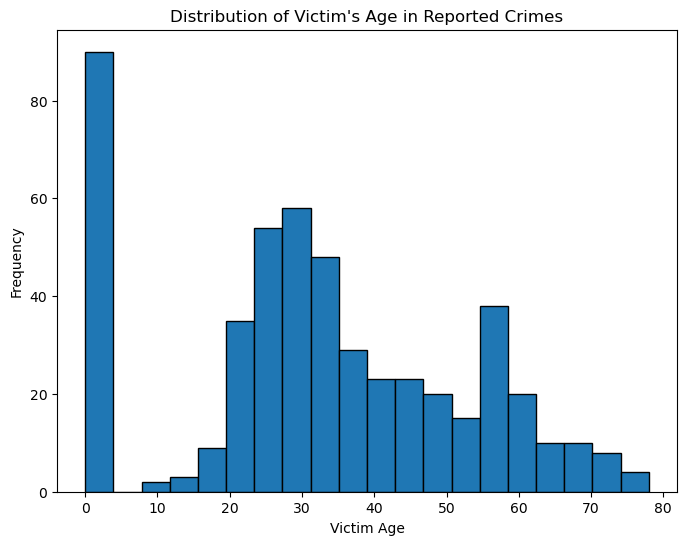

In [37]:
# Explore the distribution (consider histograms)
# Example: histogram
plt.figure(figsize=(8, 6))
plt.hist(victim_ages, bins=20, edgecolor='black')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.title("Distribution of Victim's Age in Reported Crimes")
plt.show()

# Analysis of data based on Victim's Sex

In [40]:
# 1. Distribution of Victim Sex

victim_sexs = df['Vict_Sex']

# Descriptive statistics
print("\nVictim's Sex Descriptive Statistics:")
print(victim_sexs.describe())

# Count occurrences of each gender (assuming 'M', 'F', and 'X' values)
gender_counts = victim_sexs.value_counts()

# Print results in a clear format
print("\nVictim's Sex Distribution:")
print(gender_counts.to_string())



Victim's Sex Descriptive Statistics:
count     499
unique      3
top         M
freq      278
Name: Vict_Sex, dtype: object

Victim's Sex Distribution:
Vict_Sex
M    278
F    155
X     66


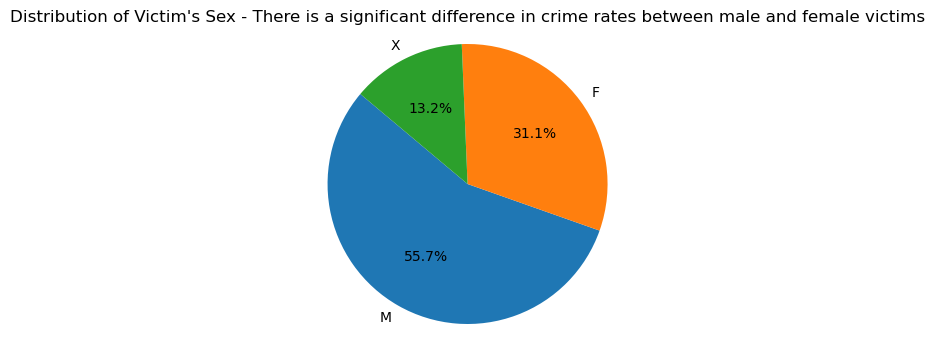

In [44]:
# Create the pie chart
plt.figure(figsize=(6, 4))  # Adjust figure size as desired
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)  # Customize labels and options
plt.title("Distribution of Victim's Sex - There is a significant difference in crime rates between male and female victims")
plt.axis('equal')  # Equal aspect ratio for a circular pie chart
plt.show()

# 7. Status Analysis: 
### Examine the status of reported crimes.
### Classify crimes based on their current status.

# Questions:
##  What is the distribution of reported crimes based on Crime Code?

In [47]:
# Reestablish the connection with sql server as python kernel became dead
conn=pymysql.connect(host='localhost',
                user='root',
                password='MySQL987654321$$',
                database='crime_database');
cur=conn.cursor();

# SQL query to retrieve data
sql_query = """
SELECT DR_NO, Current_Status, Crm_Cd, Crm_Cd_Desc
FROM crime_data_table
"""

cursor = conn.cursor()

# Execute the query and store results in a pandas DataFrame
cursor.execute(sql_query)

# Fetch data in batches (adjust fetch_size as needed)
fetch_size = 500  # Fetch 500 rows at a time
data = []
while True:
  fetched_data = cursor.fetchmany(fetch_size)
  if not fetched_data:
    break
  data.extend(fetched_data)

# Create DataFrame
df = pd.DataFrame(data, columns=[col[0] for col in cursor.description]) 

df

DR_NO Current_Status  Crm_Cd  \
0     10304468             AO     624   
1    190101086             IC     624   
2    191501505             IC     745   
3    191921269             IC     740   
4    200100502             IC     442   
..         ...            ...     ...   
494  211507896             IC     354   
495  211613998             IC     354   
496  211715638             IC     354   
497  220705246             IC     341   
498  222013040             IC     354   

                                           Crm_Cd_Desc  
0                             BATTERY - SIMPLE ASSAULT  
1                             BATTERY - SIMPLE ASSAULT  
2             VANDALISM - MISDEAMEANOR ($399 OR UNDER)  
3    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  
4             SHOPLIFTING - PETTY THEFT ($950 & UNDER)  
..                                                 ...  
494                                  THEFT OF IDENTITY  
495                                  THEFT OF IDENTITY  
496                                  THEFT OF IDENTITY  
497  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...  
498                                  THEFT OF IDENTITY  

[499 rows x 4 columns]

# Distribution of reported crimes based on Crime Code

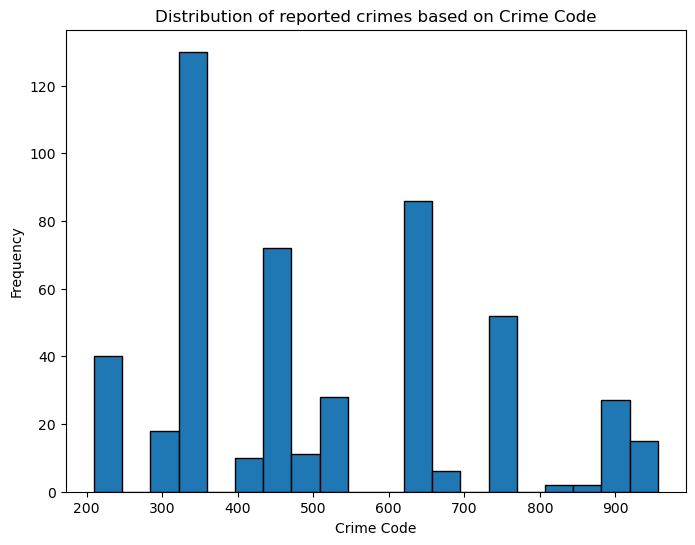

In [48]:
# Distribution of reported crimes based on Crime Code (with histograms )
import matplotlib.pyplot as plt

crime_code = df['Crm_Cd']

plt.figure(figsize=(8, 6))
plt.hist(crime_code, bins=20, edgecolor='black')
plt.xlabel('Crime Code')
plt.ylabel('Frequency')
plt.title('Distribution of reported crimes based on Crime Code')

plt.show()

# Classification of Crimes by Current Status

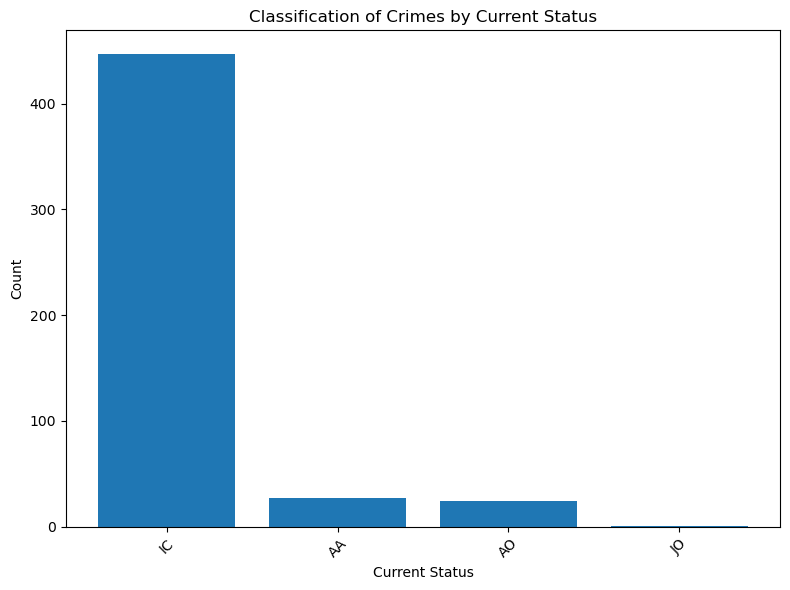

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Current_Status' (with uppercase C) is the correct column name
current_statuses = df['Current_Status']  # Access the column with the correct name

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(current_statuses.value_counts().index, current_statuses.value_counts().values)
plt.xlabel('Current Status')
plt.ylabel('Count')
plt.title('Classification of Crimes by Current Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (optional)
plt.tight_layout()

plt.show()

# CLOSE SQL DATABASE CONNECTION AFTER EVERYTHING IS DONE

### I re-established the connection to make sure correctly Connected to the MySQL server & Then Close the connection manually

In [51]:
conn = pymysql.connect(host='localhost', user='root', password='MySQL987654321$$', database='crime_database')
 
conn.close()  # closes the connection with sql database and keeps python running